## Coletando a base de dados
Wireless Indoor Localization Data Set

https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization#


In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt

--2020-10-27 16:28:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62000 (61K) [application/x-httpd-php]
Saving to: ‘wifi_localization.txt’

wifi_localization.t 100%[===================>]  60.55K  --.-KB/s    in 0.1s    

2020-10-27 16:28:01 (466 KB/s) - ‘wifi_localization.txt’ saved [62000/62000]



In [2]:
import pandas as pd
import numpy as np

In [3]:
data = np.loadtxt('wifi_localization.txt')

In [4]:
data.shape

(2000, 8)

In [5]:
data

array([[-64., -56., -61., ..., -82., -81.,   1.],
       [-68., -57., -61., ..., -85., -85.,   1.],
       [-63., -60., -60., ..., -85., -84.,   1.],
       ...,
       [-62., -59., -46., ..., -87., -88.,   4.],
       [-62., -58., -52., ..., -90., -85.,   4.],
       [-59., -50., -45., ..., -88., -87.,   4.]])

In [6]:
cols_wifi_nomes = [f'wifi_{i+1}' for i in range(7)]
cols_wifi_nomes

['wifi_1', 'wifi_2', 'wifi_3', 'wifi_4', 'wifi_5', 'wifi_6', 'wifi_7']

In [7]:
data_df = pd.DataFrame(data, columns=cols_wifi_nomes+['sala'])

In [8]:
data_df['sala'] = data_df['sala'].astype('object')

In [9]:
data_df.dtypes

wifi_1    float64
wifi_2    float64
wifi_3    float64
wifi_4    float64
wifi_5    float64
wifi_6    float64
wifi_7    float64
sala       object
dtype: object

In [10]:
data_df

,wifi_1,wifi_2,wifi_3,wifi_4,wifi_5,wifi_6,wifi_7,sala
0,-64.0,-56.0,-61.0,-66.0,-71.0,-82.0,-81.0,1
1,-68.0,-57.0,-61.0,-65.0,-71.0,-85.0,-85.0,1
2,-63.0,-60.0,-60.0,-67.0,-76.0,-85.0,-84.0,1
3,-61.0,-60.0,-68.0,-62.0,-77.0,-90.0,-80.0,1
4,-63.0,-65.0,-60.0,-63.0,-77.0,-81.0,-87.0,1
...,...,...,...,...,...,...,...,...
1995,-59.0,-59.0,-48.0,-66.0,-50.0,-86.0,-94.0,4
1996,-59.0,-56.0,-50.0,-62.0,-47.0,-87.0,-90.0,4
1997,-62.0,-59.0,-46.0,-65.0,-45.0,-87.0,-88.0,4
1998,-62.0,-58.0,-52.0,-61.0,-41.0,-90.0,-85.0,4


In [11]:
data_df.describe()

,wifi_1,wifi_2,wifi_3,wifi_4,wifi_5,wifi_6,wifi_7
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000


In [12]:
data_df['sala'].value_counts()

4.0    500
3.0    500
2.0    500
1.0    500
Name: sala, dtype: int64

In [13]:
X = data[:,:-1]
print(X.shape)
print(X)

(2000, 7)
[[-64. -56. -61. ... -71. -82. -81.]
 [-68. -57. -61. ... -71. -85. -85.]
 [-63. -60. -60. ... -76. -85. -84.]
 ...
 [-62. -59. -46. ... -45. -87. -88.]
 [-62. -58. -52. ... -41. -90. -85.]
 [-59. -50. -45. ... -45. -88. -87.]]


In [14]:
y = data[:,-1]
y = y.astype('int8')
print(y.shape)
print(y.dtype)
print(y)

(2000,)
int8
[1 1 1 ... 4 4 4]


### Conjuntos de treino e teste

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 7)
(400, 7)
(1600,)
(400,)


In [18]:
pd.DataFrame(X_train, columns=cols_wifi_nomes).describe()

,wifi_1,wifi_2,wifi_3,wifi_4,wifi_5,wifi_6,wifi_7
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,-52.087500,-55.640625,-54.865625,-53.274375,-62.476250,-80.982500,-81.711875
std,11.335294,3.444218,5.342088,11.512197,9.192851,6.550211,6.583859
min,-73.000000,-74.000000,-73.000000,-77.000000,-86.000000,-97.000000,-98.000000
25%,-61.000000,-58.000000,-58.000000,-62.000000,-69.000000,-86.000000,-87.000000
50%,-53.000000,-56.000000,-55.000000,-55.000000,-64.000000,-82.000000,-83.000000
75%,-45.750000,-53.000000,-51.000000,-45.000000,-55.750000,-77.000000,-78.000000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-62.000000,-63.000000


In [19]:
pd.DataFrame(y_test, columns=['y'])['y'].value_counts()

1    128
2     92
4     91
3     89
Name: y, dtype: int64

### Ajuste dos valores numéricos. Reescala linear.

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [22]:
pd.DataFrame(X_train, columns=cols_wifi_nomes).describe()

,wifi_1,wifi_2,wifi_3,wifi_4,wifi_5,wifi_6,wifi_7
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.331944,0.633082,0.549527,0.359479,0.470475,0.457643,0.465375
std,0.179925,0.118766,0.161881,0.174427,0.183857,0.187149,0.188110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.190476,0.551724,0.454545,0.227273,0.340000,0.314286,0.314286
50%,0.317460,0.620690,0.545455,0.333333,0.440000,0.428571,0.428571
75%,0.432540,0.724138,0.666667,0.484848,0.605000,0.571429,0.571429
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Vamos fazer o ajuste para One-Hot dos dados das classes. 
Temos 4 classes (Salas 1,2,3 e 4). 

In [23]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [24]:
y_train

array([1, 2, 2, ..., 4, 4, 3], dtype=int8)

In [25]:
y_train.shape

(1600,)

In [26]:
to_categorical(y_train)

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [27]:
to_categorical(y_train)[:,0].sum()

0.0

Isso aconteceu pois nossas classes começam do 1, e não do zero.

Para não modificar a lógica, vamos desconsiderar a coluna 0.

In [28]:
to_categorical(y_train)[:,1:]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [29]:
y_train = to_categorical(y_train)[:,1:]
y_test = to_categorical(y_test)[:,1:]

In [30]:
print(y_train.shape)
print(y_test.shape)

(1600, 4)
(400, 4)


## Criando uma Rede Neural MLP

Vamos usar o modelo **sequencial** do Tensorflow-Keras para criar nossa primeira rede profunda. 

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
tf.__version__

'2.3.0'

In [59]:
model = keras.Sequential(name="LastDeepModel")
model.add(keras.Input(shape=(7,))) 
model.add(layers.Dense(7, activation="relu"))
model.add(layers.Dense(14, activation="relu"))
model.add(layers.Dense(4, activation="softmax"))


In [60]:
model.layers

In [61]:
model.layers[0].weights

[<tf.Variable 'dense_9/kernel:0' shape=(7, 7) dtype=float32, numpy=
 array([[-0.46016476, -0.3497033 ,  0.37133336,  0.03611088,  0.12470579,
          0.40333056, -0.12257838],
        [ 0.06656116,  0.60103464,  0.50622666,  0.4782219 ,  0.07500905,
         -0.34009838,  0.00279683],
        [ 0.6484412 ,  0.48087502,  0.20230174,  0.43200743, -0.3386846 ,
         -0.4675994 ,  0.6340362 ],
        [-0.01240331,  0.530789  ,  0.28914368,  0.00993758, -0.28357124,
          0.15017283,  0.1747638 ],
        [-0.46826416, -0.60112286, -0.0653401 , -0.10079908, -0.43644392,
         -0.54689616,  0.09408253],
        [-0.4072492 , -0.6281618 ,  0.30819482,  0.3269257 ,  0.02021271,
         -0.5083376 ,  0.14087832],
        [-0.64200294, -0.3758086 ,  0.33624828,  0.0321005 ,  0.295884  ,
         -0.02882969, -0.188378  ]], dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(7,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

Vamos calcular quantos parâmetros treináveis temos nesta rede:

Camada de entrada (7): 0 = 0 + 0 [TOTAL = 0]

Camada escondida 1 (4): 32 = 4*7 + 4 [TOTAL = 0 + 32 = 32]

Camada escondida 2 (2): 10 = 2*4 + 2 [TOTAL = 32 + 10 = 42]

Camada de saída (4): 12 = 4*2 + 4 [TOTAL = 42 + 12 = 54]

Total de parâmetros treináveis = 54

In [62]:
model.summary()

Model: "LastDeepModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_10 (Dense)             (None, 14)                112       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 60        
Total params: 228
Trainable params: 228
Non-trainable params: 0
_________________________________________________________________


In [63]:
optimizer = keras.optimizers.SGD(learning_rate=0.001) 
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [64]:
hist = model.fit(X_train, y_train, epochs=150, batch_size=8, validation_split=0.1)

Epoch 1/150
180/180 [==============================] - 0s 2ms/step - loss: 1.4548 - accuracy: 0.2042 - val_loss: 1.4520 - val_accuracy: 0.2188
Epoch 2/150
180/180 [==============================] - 0s 1ms/step - loss: 1.4302 - accuracy: 0.2569 - val_loss: 1.4248 - val_accuracy: 0.2500
Epoch 3/150
180/180 [==============================] - 0s 1ms/step - loss: 1.4144 - accuracy: 0.2264 - val_loss: 1.4124 - val_accuracy: 0.2313
Epoch 4/150
180/180 [==============================] - 0s 982us/step - loss: 1.4075 - accuracy: 0.1924 - val_loss: 1.4062 - val_accuracy: 0.2188
Epoch 5/150
180/180 [==============================] - 0s 967us/step - loss: 1.4031 - accuracy: 0.1889 - val_loss: 1.4014 - val_accuracy: 0.1937
Epoch 6/150
180/180 [==============================] - 0s 962us/step - loss: 1.3995 - accuracy: 0.1861 - val_loss: 1.3972 - val_accuracy: 0.1813
Epoch 7/150
180/180 [==============================] - 0s 1ms/step - loss: 1.3962 - accuracy: 0.1715 - val_loss: 1.3934 - val_accuracy: 

In [65]:
_, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8925
Accuracy: 89.25


### Histórico do treino:

In [66]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [67]:
type(hist.history['accuracy'])

list

In [68]:
from matplotlib import pyplot as plt

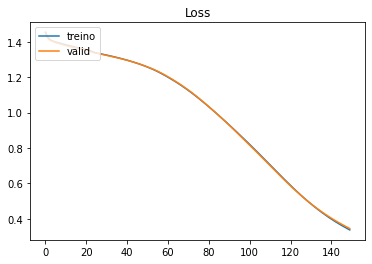

In [69]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['treino', 'valid'], loc='upper left')


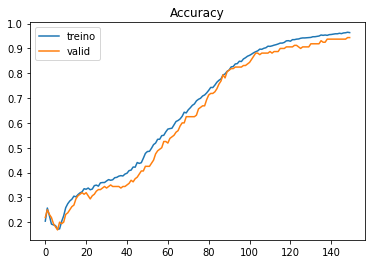

In [70]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['treino', 'valid'], loc='upper left')


In [45]:
# acessando os pesos de uma camada:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(7, 4) dtype=float32, numpy=
 array([[-0.41487   , -0.2677627 , -0.14719544,  0.31651825],
        [-0.50796324,  0.04798919,  0.6013035 ,  0.1112801 ],
        [ 0.02426417, -0.71369416,  0.09335376,  0.02409771],
        [-0.4972167 ,  0.10057926,  0.11114754,  0.15353207],
        [-0.73567295, -0.34453928,  0.05314491,  0.2814206 ],
        [ 0.73029685, -0.06776023,  0.01917372,  0.27764687],
        [ 0.5158963 , -0.3301557 , -0.43071482, -0.5935294 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([-0.00013322,  0.        , -0.0006335 ,  0.00202309], dtype=float32)>]

Vamos variar alguns parâmetros:
* Camadas e larguras
* Taxa de aprendizagem